In [1]:
from bs4 import BeautifulSoup
from pprint import pprint
from urllib import request
from nltk import sent_tokenize
import nltk.data
from nltk.corpus import stopwords
# import matplotlib.pyplot as plt
import nltk
import json
import time
import sys
import re
import numpy
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math

nltk.data.path.append('D:/WS/MSc/TMP/nltk_data')

RESOURCES_PATH_LINKS = 'Resources/Corpora/EU/Links/'
RESOURCES_PATH_POSTS = 'Resources/Corpora/EU/Posts/'
RESOURCES_COMPLETE_CORPORA_FILENAME = 'complete_wow_class_posts_dict'


class WowClassesResources:

    def __init__(self):
        None

    WOW_FORUM_ROOT_URL_EU = 'http://eu.battle.net'
    WOW_FORUM_ROOT_URL_US = 'http://us.battle.net'
    WOW_FORUM_MID_URL = '/forums/en/wow/'
    URL_PAGE_ATTRIBUTE = "?page="

    WOW_CLASS_LIST_EU = [('Death Knight', "874789/"),
                      ('Demon Hunter', "19369494/"),
                      ('Druid', "874790/"),
                      ('Hunter', "874791/"),
                      ('Mage', "874792/"),
                      ('Monk', "6038099/"),
                      ('Paladin', "874793/"),
                      ('Priest', "874794/"),
                      ('Rogue', "874795/"),
                      ('Shaman', "874796/"),
                      ('Warlock', "874929/"),
                      ('Warrior', "874930/")]
    WOW_CLASS_LIST_US = [('Death Knight', "1012662/"),
                      ('Demon Hunter', "22813967/"),
                      ('Druid', "1012663/"),
                      ('Hunter', "1012664/"),
                      ('Mage', "1012760/"),
                      ('Monk', "7379141/"),
                      ('Paladin', "1012668/"),
                      ('Priest', "1012666/"),
                      ('Rogue', "1012667/"),
                      ('Shaman', "1012669/"),
                      ('Warlock', "1012670/"),
                      ('Warrior', "1012759/")]

    class GameType:
        # PVP: 2v2 3v3 5v5 cc
        # AB, AV, BET, DR, Efc, EotS, FC, FR, FRR, IoC, LH, LM, Mid, MT, SW, Stags,
        # SoTA, SSM, ST, TB, ToK, TP, TP, WG, WSG, WV, WW, arena
        PVP = 'pvp'
        # PVE: heroic, mythic, mythic+, m+, scenario, boss, mobs, time-walking
        # LFR
        # ZF, WC, VC, DM, Ulda, UBRS, Strat, Stocks, Stockade, ST, AH, SM, SH, SFK, Scholo, RFK, RFD, RFC, MC, Mara, LBRS, Gnomer, DM Warpwood, DM East, BWL, BRD, BFD, AQ40, TAQ, AQ10, RAQ, 
        PVE = 'pve'
        OTHER = 'other'
        PVP_CRITERIA = ['pvp', '2v2', '3v3', '5v5', 'cc',
                        'AB', 'AV', 'BET', 'DR', 'Efc', 'EotS', 'FC', 'FR', 'FRR', 'IoC',
                        'LH', 'LM', 'Mid', 'MT', 'SW', 'Stags', 'SoTA', 'SSM', 'ST', 'TB',
                        'ToK', 'TP', 'TP', 'WG', 'WSG', 'WV', 'WW',
                        'arena', 'bg', 'rbg', 'warsong', 'flag', 'capture', 'fr', 'fc', 'ftw',
                        'duel', 'skirmish', 'lom', 'arathi', 'los', 'focus', 'nuke', 'poly',
                        'sheep', 'alterac', '2s', '3s', '5s', 'rated', 'rating', 'battleground',
                        'battle ground', 'nagrand', 'blade\'s edge', 'blades edge',
                        'tiger\'s peak', 'tigers peak', 'ashamane\'s fall', 'ashamanes fall',
                        'black rook hold', 'tol\'viron', 'tolviron', 'dalaran', 'ruins',
                        'championship', 'deepwind gorge', 'kotmogu', 'silvershard',
                        'twin peaks', 'gilneas', 'strand', 'ashran', 'gladiator', 'mmr',
                        'honor', 'prestige']
        PVE_CRITERIA = ['pve', 'heroic', 'mythic', 'mythic+', 'm+', 'scenario', 'boss', 'mobs',
                        'time-walk', 'time-walking'
                        'RFC', 'VC', 'DM', 'WC', 'SFK', 'Stocks', 'Stockade', 'BFD', 'Gnomer', 
                        'SH', 'SM', 'RFK', 'Mara', 'Ulda', 'DM', 'Warpwood', 'DM', 'East', 'Scholo', 
                        'RFD', 'Strat', 'ZF', 'BRD', 'ST', 'AH', 'LBRS', 'UBRS', 'AQ', 'RAQ', 'MC',
                        'BWL', 'AQ40', 'TAQ', 'Ramps', 'BF', 'SP', 'UB', 'MT', 'AC', 'AS', 'Seth',
                        'Seth', 'Halls', 'SV', 'SH', 'Shatt', 'Halls', 'SL', 'Slabs', 'OH',
                        'DH', 'DK', 'Durn', 'Mech', 'Bot', 'Arc', 'BM', 'MgT', 'Terrace', 'MrT',
                        'HoR', 'Naxx', 'OS', 'Sarth', 'Vault', 'VoA', 'Maly',
                        'EoE', 'Uld', 'TC', 'ToC', 'TotC', 'ToGC', '(Heroic)', 'Ony',
                        'RS', 'Hal', 'ICC', 'UK', 'UTK', 'Nexus', 'Nex', 'AZN', 'AN', 'ANK',
                        'OLD', 'AKO', 'OK', 'DTK', 'VH', 'GD', 'HOS', 'Occ', 'HOL', 'UP', 'Culling',
                        'COS', 'Champ', 'ToC', 'FoS', 'PoS', 'TotT', 'BRC', 'SC', 'VP', 'LCoT', 'GB',
                        'HoO', 'H-DM', 'H-VC', 'H-SFK', 'ZA', 'ZG', 'ET', 'WoE', 'HoT', 'BH',
                        'BoT', 'TFW', 'BWD', 'FL', 'DS', 'SH', 'Scholo', 'TJS', 'SB', 'MP',
                        'SPM', 'GSS', 'SNT', 'MV', 'HoF', 'TES', 'ToT', 'SoO', 'BSM', 'Auch', 'SR',
                        'GD', 'SBG', 'EB', 'UBRS', 'HM', 'BF', 'BRF', 'HC', 'HFC', 'arc', 'VoW', 'MoS',
                        'CoS', 'EN', 'BRH', 'RtK', 'arc', 'ToV', 'VH', 'CoN', 'EoZ', 'NL', 'HoV', 'GR',
                        'DHT', 'DT']

WOW_TOPIC_URLS_EU = \
    [(c, WowClassesResources.WOW_FORUM_ROOT_URL_EU + WowClassesResources.WOW_FORUM_MID_URL + u)
     for (c, u) in WowClassesResources.WOW_CLASS_LIST_EU]

D:\Soft\python351\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
print(WOW_TOPIC_URLS_EU[0])
url = WOW_TOPIC_URLS_EU[0][1]
# req = request.Request(url)
response = request.urlopen(url)
html = response.read().decode('utf8')
print(html[:100])

('Death Knight', 'http://eu.battle.net/forums/en/wow/874789/')





<html xmlns="http://www.w3.org/1999/xhtml">

<head>
	<meta http-equiv="X-UA-Compatible" content="


In [3]:
def get_page_content(url):
    attempt_number = 0
    while True:
        attempt_number += 1
        if attempt_number > 5:
            return None
        try:
            response = request.urlopen(url)
        except request.HTTPError as e:
            print('HTTPError = ' + str(e.code))
            continue
        except Exception as e:
            print(e)
            continue
        except e:
            print(e)
            continue
        html = response.read().decode('utf8')
        break
    return html


def topic_scrape(forum_url):
    all_links = []
    i = 1
    while True:
        html = get_page_content(forum_url + WowClassesResources.URL_PAGE_ATTRIBUTE + str(i))
        if html is None:
            return []
        bs_html = BeautifulSoup(html, "html.parser")

        all_link_elements = bs_html.find_all("a", class_="ForumTopic")
        # pprint(all_link_elements)
        link_count = len(all_link_elements)
        print(str(i) + ' ' + str(link_count))

        if link_count == 0:
            print('Exiting')
            break
        for a in all_link_elements:
            # print a
            title = a.find(class_='ForumTopic-title').get_text().strip()
            # print title
            all_links.append((a['href'], title))
        i += 1
        time.sleep(3)
    return all_links


def extract_topic(topic_title_url_tuple):
    topic_url_ending = topic_title_url_tuple[0]
    topic_title = topic_title_url_tuple[1]
    pprint('[' + topic_title + '] (' + topic_url_ending + ')')
    all_posts = []
    i = 1
    while True:
        html = get_page_content(
            WowClassesResources.WOW_FORUM_ROOT_URL_EU + topic_url_ending + WowClassesResources.URL_PAGE_ATTRIBUTE + str(
                i))
        if html is None:
            return []
        bs_html = BeautifulSoup(html, "html.parser")

        all_topic_post_elements = bs_html.find_all("div", class_="TopicPost-content")
        # pprint(all_topic_post_elements)
        link_count = len(all_topic_post_elements)
        # print str(i) + ' ' + str(link_count)

        if link_count == 0:
            print('Exiting')
            break
        for element in all_topic_post_elements:
            # print a
            post_body = element.find(class_='TopicPost-bodyContent').get_text().strip()
            post_date = element.find("a", class_='TopicPost-timestamp')['data-tooltip-content']
            author_element = element.find("span", class_='Author-name')
            if author_element is not None:
                # post_author = '<UNKNOWN>'
                if author_element.a is not None:
                    post_author = author_element.a.get_text().strip()
                else:
                    post_author = author_element.get_text().strip()
                all_posts.append((topic_title, post_date, post_author, post_body))
        i += 1
        time.sleep(5)
    pprint('posts: ' + str(len(all_posts)))
    return all_posts


def save_to_json_file(path, file_name, content, mode):
    with open(path + file_name + '.json', mode) as out_file:
        json.dump(content, out_file)


def read_from_json_file(path, file_name):
    try:
        with open(path + file_name + '.json', 'r') as in_file:
            return json.load(in_file)
    except FileNotFoundError as e:
        print('File not found, skipping read for: ' + path + file_name)

In [4]:
# READ CURRENT CLASS TO WORK WITH, READ ALL CORPORA
currentClass = WOW_TOPIC_URLS_EU[0]
print('Current Class: ' + currentClass[0] + ', URL: ' + currentClass[1])
# READ DICTIONARY OF POSTS
posts_by_class = read_from_json_file('Resources/Corpora/EU/Posts/', 'corpora_posts_' + currentClass[0])
print('Number of posts: ' + str(len(posts_by_class[currentClass[0]])))
# print('First post:\n' + posts_by_class[currentClass[0]][0][3])

all_posts_dict = read_from_json_file(RESOURCES_PATH_POSTS, RESOURCES_COMPLETE_CORPORA_FILENAME)
print(all_posts_dict.keys())
for wow_class in all_posts_dict:
    print(wow_class + ': ' + str(len(all_posts_dict.get(wow_class))) + ' posts\t\t' 
          + 'Longest post length: ' + str(max(len(p[3]) for p in all_posts_dict[wow_class])))
    
# print(sys.maxsize)
# posts_with_game_type = {currentClass[0]: []}
from _operator import index

posts_with_game_type_dict = {}

for wow_class in all_posts_dict:
    print('Processing: ' + wow_class)
    posts_with_game_type_dict[wow_class] = []
    i = 0
    for post in all_posts_dict[wow_class]:
        i += 1
        if i % 1000 == 0:
            print("Progress: " + str(i) + '/' + str(len(all_posts_dict[wow_class])))
        
        postBody = post[3]
        post.append(WowClassesResources.GameType.OTHER)
        pvpIndex = sys.maxsize
        pveIndex = sys.maxsize
        
        # find PVP minimum index
        for crit in WowClassesResources.GameType.PVP_CRITERIA:
            critMatch = re.search(r'\b' + crit.lower() + r'\b', postBody.lower())
            if critMatch is not None:
                ind = critMatch.start()
            else:
                continue
            if ind != -1:
                pvpIndex = min(pvpIndex, ind)
        # find PVE minimum index
        for crit in WowClassesResources.GameType.PVE_CRITERIA:
            critMatch = re.search(r'\b' + crit.lower() + r'\b', postBody.lower())
            if critMatch is not None:
                ind = critMatch.start()
            else:
                continue
            if ind != -1:
                pveIndex = min(pveIndex, ind)

        if pvpIndex == sys.maxsize and pveIndex == sys.maxsize:
            post[4] = WowClassesResources.GameType.OTHER
        elif pvpIndex != sys.maxsize and pveIndex == sys.maxsize:
            post[4] = WowClassesResources.GameType.PVP
        elif pvpIndex == sys.maxsize and pveIndex != sys.maxsize:
            post[4] = WowClassesResources.GameType.PVE
        elif pvpIndex <= pveIndex:
            post[4] = WowClassesResources.GameType.PVP
        else:
            post[4] = WowClassesResources.GameType.PVE
        # posts_with_game_type_dict[wow_class].append(post)

posts_with_game_type_dict = all_posts_dict
# pprint(posts_with_game_type[currentClass[0]][:10])
print(posts_with_game_type_dict.keys())
pprint(posts_with_game_type_dict['Death Knight'][:3])

Current Class: Death Knight, URL: http://eu.battle.net/forums/en/wow/874789/


Number of posts: 34186


dict_keys(['Death Knight', 'Demon Hunter'])
Death Knight: 34186 posts		Longest post length: 14170
Demon Hunter: 11916 posts		Longest post length: 7895
Processing: Death Knight


Progress: 1000/34186


Progress: 2000/34186


Progress: 3000/34186


Progress: 4000/34186


Progress: 5000/34186


Progress: 6000/34186


Progress: 7000/34186


Progress: 8000/34186


Progress: 9000/34186


Progress: 10000/34186


Progress: 11000/34186


Progress: 12000/34186


Progress: 13000/34186


Progress: 14000/34186


Progress: 15000/34186


Progress: 16000/34186


Progress: 17000/34186


Progress: 18000/34186


Progress: 19000/34186


Progress: 20000/34186


Progress: 21000/34186


Progress: 22000/34186


Progress: 23000/34186


Progress: 24000/34186


Progress: 25000/34186


Progress: 26000/34186


Progress: 27000/34186


Progress: 28000/34186


Progress: 29000/34186


Progress: 30000/34186


Progress: 31000/34186


Progress: 32000/34186


Progress: 33000/34186


Progress: 34000/34186


Processing: Demon Hunter


Progress: 1000/11916


Progress: 2000/11916


Progress: 3000/11916


Progress: 4000/11916


Progress: 5000/11916


Progress: 6000/11916


Progress: 7000/11916


Progress: 8000/11916


Progress: 9000/11916


Progress: 10000/11916


Progress: 11000/11916


dict_keys(['Death Knight', 'Demon Hunter'])
[['[Guide]Death Knight 101 (Updated for 7.03)',
  '22/05/2014 11:27',
  'Hakuteiken',
  'This if for all the really new Death Knights; my guide on the class '
  "overall. In this guide I'll be covering our resource system, what abilities "
  "you have, how they work and what they do. I'll also throw in some "
  'suggestions on gameplay that should make things somewhat easier for '
  "you.It's worth nothing that Death Knights, at lower levels, are "
  'ridiculously powerful which is a state of affairs I found to be really dull '
  "when leveling my latest Death Knight; it's not much fun when you're "
  'immortal and killing things with 2-3 attacks, but anyway, here goes.First '
  "thing's first; Resources-We have two different resources; Runes and Runic "
  'Power.We have a total of 6 runes which can be used for any attack that '
  'costs Runes; Obliterate, Howling Blast, Festering Strike, Marrowrend '
  'etc.-Runic Power is generated from use

In [5]:
# RESTRUCTURE TO CLASS/Game Type/author/list of posts
# pprint([w[3] for w in posts_with_game_type_dict['Death Knight'] if w[4] == 'pve'][2:15])
posts_by_class_gametype_author = {}
    
for wow_class in posts_with_game_type_dict:
    # print('***' + wow_class)
    posts_by_class_gametype_author[wow_class] = {'pve': {}, 'pvp': {}, 'other': {}}
    for w in posts_with_game_type_dict[wow_class]:
        # print(w[2])
        if w[2] not in posts_by_class_gametype_author[wow_class][w[4]]:
            # print(w[4] + ': ' + w[2])
            posts_by_class_gametype_author[wow_class][w[4]][w[2]] = []
        posts_by_class_gametype_author[wow_class][w[4]][w[2]].append((sent_tokenize(w[3]), w[1]))

# COUNT posts
c = 0
for wow_class in posts_by_class_gametype_author:
    print('**** ' + wow_class)
    for gt in posts_by_class_gametype_author[wow_class]:
        print('** ' + gt + ': ' + str(len(posts_by_class_gametype_author[wow_class][gt])))
        for au in posts_by_class_gametype_author[wow_class][gt]:
            for p in posts_by_class_gametype_author[wow_class][gt][au]:
                c += 1
            # print(au)
print(c)

# CURRENT STRUCTURE:
#   WOW_CLASS
#       PVE/PVE/OTHER
#           AUTHOR
#               (POST, DATE)

**** Death Knight
** pvp: 1273
** other: 4398
** pve: 4336
**** Demon Hunter
** pvp: 542
** other: 1686
** pve: 1682
46102


Death Knight
  pve other   pvp 
17050 13995  3141 
None


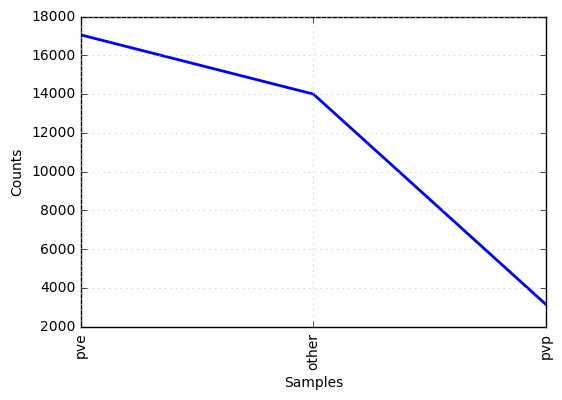

None
Demon Hunter
  pve other   pvp 
 6105  4648  1163 
None


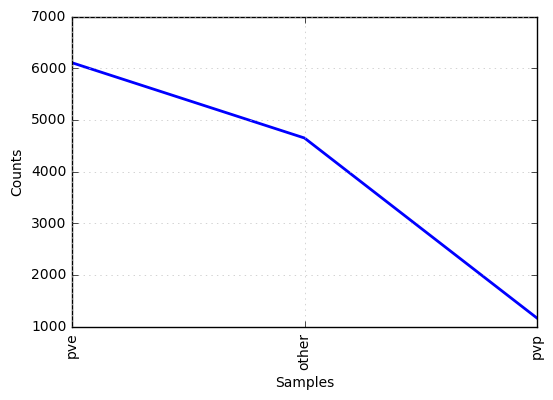

None


In [6]:
# plot histogram of findings
for wow_class in posts_with_game_type_dict:
    post_game_type_distribution = [post[4] for post in posts_with_game_type_dict.get(wow_class)]
    fdistGameType = nltk.FreqDist(post_game_type_distribution)
    print(wow_class)
    pprint(fdistGameType.tabulate())
    pprint(fdistGameType.plot())

In [7]:
# Print structure:
pprint('Dict level 1: ' + str(posts_by_class_gametype_author.keys()))
pprint('Dict level 2: ' + str(posts_by_class_gametype_author['Death Knight'].keys()))
pprint('Dict level 3: ' + str(list(posts_by_class_gametype_author['Death Knight']['pvp'])[:5]) + ' ...')
pprint('Dict level 4: ' + str(posts_by_class_gametype_author['Death Knight']['pvp']['Symmetry']))

"Dict level 1: dict_keys(['Death Knight', 'Demon Hunter'])"
"Dict level 2: dict_keys(['pvp', 'other', 'pve'])"
"Dict level 3: ['Céldora', 'Drèco', 'Whosyp', 'Thjazì', 'Frostmane'] ..."
('Dict level 4: [([\'Pact.\', "Conversion is dog now since the healing from it '
 "has been nerfed and you can't double tap it anymore.Conversion for RBGs "
 'though.", \'But just not in Arena.\', "In a melee cleave season conversion '
 'doesn\'t do jack.", \'It was good against lock teams last season - and '
 "almost every team had a Lock.'], '25/12/2014 02:56')]")


In [8]:
sid = SentimentIntensityAnalyzer()
# print(sid.polarity_scores('good bad ugly beautiful.'))
scores_by_class_gametype_author_post = {}
scores_by_class_gametype_author = {}
scores_by_class_gametype = {}
for wow_class in posts_by_class_gametype_author:
    scores_by_class_gametype_author_post[wow_class] = {}
    scores_by_class_gametype_author[wow_class] = {}
    scores_by_class_gametype[wow_class] = {}
    for gt in posts_by_class_gametype_author[wow_class]:
        scores_by_class_gametype_author_post[wow_class][gt] = {}
        scores_by_class_gametype_author[wow_class][gt] = []
        print(wow_class + ' ' + gt + ': ' + str(len(posts_by_class_gametype_author[wow_class][gt])))
        i = 0
        for author in posts_by_class_gametype_author[wow_class][gt]:
            scores_by_class_gametype_author_post[wow_class][gt][author] = []
            i += 1
            if i % 250 == 0:
                print(">>>\n>>>Progress: " + str(i) + '/'
                      + str(len(posts_by_class_gametype_author[wow_class][gt])))
            for post in posts_by_class_gametype_author[wow_class][gt][author][:2]:
                post_score = []
                for sent in post[0]:
                    post_score.append(sid.polarity_scores(sent)['compound'])
                #print(post_score)
                post_score_array = numpy.array(post_score)
                sc = numpy.mean(post_score_array)
                if sc > 0.5 or sc < -0.5:
                    # print(sc)
                    scores_by_class_gametype_author_post[wow_class][gt][author].append([post[0], sc])
            author_score_array = numpy.array([au_sc[1] for au_sc 
                                             in scores_by_class_gametype_author_post[wow_class][gt][author]])
            auth_sc = numpy.mean(author_score_array)
            if not math.isnan(auth_sc):
                scores_by_class_gametype_author[wow_class][gt].append((author, auth_sc))
                # print(author + ': ' + str(auth_sc))
        gt_score_array = numpy.\
            array([au_sc[1] for au_sc in scores_by_class_gametype_author[wow_class][gt]])
        gt_score = numpy.mean(gt_score_array)
        if not math.isnan(gt_score):
            scores_by_class_gametype[wow_class][gt] = gt_score
            print('***\n** ' + wow_class + ' ' + gt + ': ' + str(gt_score))

print('DONE!!!')

Death Knight pvp: 1273


D:\Soft\python351\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\Soft\python351\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


>>>
>>>Progress: 250/1273


>>>
>>>Progress: 500/1273


>>>
>>>Progress: 750/1273


>>>
>>>Progress: 1000/1273


>>>
>>>Progress: 1250/1273


***
** Death Knight pvp: 0.194032021452
Death Knight other: 4398


>>>
>>>Progress: 250/4398


>>>
>>>Progress: 500/4398


>>>
>>>Progress: 750/4398


>>>
>>>Progress: 1000/4398


>>>
>>>Progress: 1250/4398


>>>
>>>Progress: 1500/4398


>>>
>>>Progress: 1750/4398


>>>
>>>Progress: 2000/4398


>>>
>>>Progress: 2250/4398


>>>
>>>Progress: 2500/4398


>>>
>>>Progress: 2750/4398


>>>
>>>Progress: 3000/4398


>>>
>>>Progress: 3250/4398


>>>
>>>Progress: 3500/4398


>>>
>>>Progress: 3750/4398


>>>
>>>Progress: 4000/4398


>>>
>>>Progress: 4250/4398
***
** Death Knight other: 0.301553385079
Death Knight pve: 4336


>>>
>>>Progress: 250/4336


>>>
>>>Progress: 500/4336


>>>
>>>Progress: 750/4336


>>>
>>>Progress: 1000/4336


>>>
>>>Progress: 1250/4336


>>>
>>>Progress: 1500/4336


>>>
>>>Progress: 1750/4336


>>>
>>>Progress: 2000/4336


>>>
>>>Progress: 2250/4336


>>>
>>>Progress: 2500/4336


>>>
>>>Progress: 2750/4336


>>>
>>>Progress: 3000/4336


>>>
>>>Progress: 3250/4336


>>>
>>>Progress: 3500/4336


>>>
>>>Progress: 3750/4336


>>>
>>>Progress: 4000/4336


>>>
>>>Progress: 4250/4336


***
** Death Knight pve: 0.229396658454
Demon Hunter pvp: 542


>>>
>>>Progress: 250/542


>>>
>>>Progress: 500/542


***
** Demon Hunter pvp: 0.0632010964912
Demon Hunter other: 1686


>>>
>>>Progress: 250/1686


>>>
>>>Progress: 500/1686


>>>
>>>Progress: 750/1686


>>>
>>>Progress: 1000/1686


>>>
>>>Progress: 1250/1686


>>>
>>>Progress: 1500/1686


***
** Demon Hunter other: 0.200352106538
Demon Hunter pve: 1682


>>>
>>>Progress: 250/1682


>>>
>>>Progress: 500/1682


>>>
>>>Progress: 750/1682


>>>
>>>Progress: 1000/1682


>>>
>>>Progress: 1250/1682


>>>
>>>Progress: 1500/1682


***
** Demon Hunter pve: 0.226781661543
DONE!!!


In [18]:
import datetime
ALGORITHM = 'Vader'
CURRENT_DATE = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
FILE_NAME = 'scores_auth_' + ALGORITHM + '_' + CURRENT_DATE
# print(FILE_NAME)

score_holder = {'meta': {}}
score_holder['meta']['algorithm'] = ALGORITHM
score_holder['meta']['date'] = CURRENT_DATE
score_holder['score'] = scores_by_class_gametype_author

save_to_json_file('Resources/Corpora/EU/Scores/', FILE_NAME,
                  score_holder, 'w')
FILE_NAME = 'scores_gt_' + ALGORITHM + '_' + CURRENT_DATE
score_holder['score'] = scores_by_class_gametype
save_to_json_file('Resources/Corpora/EU/Scores/', FILE_NAME,
                  score_holder, 'w')

In [10]:
pprint(scores_by_class_gametype)

for wow_class in scores_by_class_gametype_author:
    for gt in scores_by_class_gametype_author[wow_class]:
        print(wow_class + ' ' + gt + ': ' +
              str(len(scores_by_class_gametype_author[wow_class][gt])))

{'Death Knight': {'other': 0.30155338507877666,
                  'pve': 0.22939665845351648,
                  'pvp': 0.19403202145214521},
 'Demon Hunter': {'other': 0.20035210653753024,
                  'pve': 0.22678166154309826,
                  'pvp': 0.06320109649122807}}
Death Knight pvp: 303
Death Knight other: 1079
Death Knight pve: 1101
Demon Hunter pvp: 114
Demon Hunter other: 413
Demon Hunter pve: 395


In [39]:
# READ ONTOLOGY
from owlready import *
onto_path.clear()
#onto_path.append("./Resources/")
wowOnto = get_ontology('file://Resources/Ontology/OWLXML.owl').load(True)

print(wowOnto.classes)
print(to_owl(wowOnto))

[OWLXML.Destruction, OWLXML.Mage, OWLXML.Shaman, OWLXML.Rogue, OWLXML.Beast_Mastery, OWLXML.Elemental, OWLXML.Druid, OWLXML.H, OWLXML.Arcane, OWLXML.Prot, OWLXML.Demon_Hunter, OWLXML.Fire, OWLXML.Arms, OWLXML.Priest, OWLXML.Mistweaver, OWLXML.Affliction, OWLXML.Balance, OWLXML.Survival, OWLXML.Holy, OWLXML.Demonology, OWLXML.Shadow, OWLXML.Warrior]
<?xml version="1.0"?>
<!DOCTYPE Ontology [
    <!ENTITY xsd "http://www.w3.org/2001/XMLSchema#" >
    <!ENTITY rdf "http://www.w3.org/1999/02/22-rdf-syntax-ns#" >
    <!ENTITY rdfs "http://www.w3.org/2000/01/rdf-schema#" >
    <!ENTITY owl "http://www.w3.org/2002/07/owl#" >
]>
<Ontology xmlns="http://www.w3.org/2002/07/owl#" xml:base="file://Resources/Ontology/OWLXML.owl" ontologyIRI="file://Resources/Ontology/OWLXML.owl"
     xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
     xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
     xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
     xmlns:xml="http://www.w3.org/XML/1998/namespace"
>